In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import copy
%matplotlib inline

<p>Multiple Variable <b>Linear Regression</b></p>

<p>Define the <mark style="background-color:lightgreen">size</mark> of the network layers</p>

In [45]:
def layer_size(X_train, Y_train):
    in_layer = X_train.shape[0]
    out_layer = Y_train.shape[0]
    return in_layer, out_layer

<p>Initialize the model <mark style="background-color:lightgreen">parameters</mark></p>

In [46]:
def init_param(in_layer, out_layer):
    W = np.random.randn(out_layer, in_layer) * 0.01
    b = np.zeros((out_layer, 1))
    
    params = {
        "W": W,
        "b": b
    }
    
    return params

<p>Define <mark style="background-color:lightgreen">forward propagation</mark> function.</p>

In [47]:
def forward_propagation(X_train, W, b):
    y_hat = np.dot(W, X_train) + b
    return y_hat

<p>Implement <mark style="background-color:lightgreen">cost function</mark> (squared error).</p>

In [48]:
def compute_cost(Y_train, y_hat):
    cost = np.mean(np.power(y_hat - Y_train, 2)) / 2
    return cost

<p>Implement <mark style="background-color:lightgreen">backward propagation</mark>.</p>

In [49]:
def back_propagation(X_train, Y_train, y_hat):
    m = X_train.shape[1]
    dz = y_hat - Y_train
    dw = np.dot(dz, X_train.T) / m
    db = np.sum(dz, axis=1, keepdims=True) / m
    grads = {
        "dW": dw,
        "db": db
    }
    
    return grads

<p>Implement <mark style="background-color:lightgreen">train</mark> function</p>

In [50]:
def train(X_train, Y_train, alpha, n):
    
    in_layer, out_layer = layer_size(X_train, Y_train)
    params = init_param(in_layer, out_layer)
    cost_ = []
    
    for _ in range(n):
        y_hat = forward_propagation(X_train, params["W"], params["b"])
        cost = compute_cost(Y_train, y_hat)
        grads = back_propagation(X_train, Y_train, y_hat)
        
        params["W"] -= grads["dW"] * alpha
        params["b"] -= grads["db"] * alpha
        cost_.append(cost)
    
    return params, cost_

<p>Implement <mark style="background-color:lightgreen">predict</mark> function.</p> 

In [51]:
def predict(X, params):
    y_hat = np.dot(params["W"], X) + params["b"]
    return y_hat

<p>training set</p>

In [52]:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
Y_train = np.array([460, 232, 178])
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
print(X_train.shape)
print(y_train.shape)
print(w_init.shape)

(3, 4)
(3,)
(4,)


In [57]:
params_, cost_ = train(X_train.T, Y_train.reshape((1, 3)), 0.01, 100)
print(params_)
print(cost_)

{'W': array([[nan, nan, nan, nan]]), 'b': array([[nan]])}
[50253.94128334688, 28244061854317.92, 1.6097783101646938e+22, 9.17497710242879e+30, 5.229304202855131e+39, 2.980456751086544e+48, 1.6987197723642254e+57, 9.681901486975728e+65, 5.518227192530963e+74, 3.1451292279054053e+83, 1.7925753172347924e+92, 1.0216833824979049e+101, 5.823113394658202e+109, 3.3188999829031975e+118, 1.8916164515393906e+127, 1.0781321576929375e+136, 6.144844788729221e+144, 3.502271702791268e+153, 1.9961296829938466e+162, 1.137699770167314e+171, 6.484352084266608e+179, 3.695774848099788e+188, 2.1064173490807365e+197, 1.200558538026101e+206, 6.842617413193951e+214, 3.899969187702129e+223, 2.222798491655913e+232, 1.2668903000792558e+241, 7.2206771709622e+249, 4.115445418122861e+258, 2.345609779877683e+267, 1.3368869418677302e+276, 7.619625014650352e+284, 4.342826872313758e+293, 2.47520648412853e+302, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, in

/tmp/ipykernel_8079/1125832270.py:2: RuntimeWarning: overflow encountered in power
  cost = np.mean(np.power(y_hat - Y_train, 2)) / 2
/tmp/ipykernel_8079/4057311216.py:12: RuntimeWarning: invalid value encountered in subtract
  params["W"] -= grads["dW"] * alpha
/tmp/ipykernel_8079/4057311216.py:13: RuntimeWarning: invalid value encountered in subtract
  params["b"] -= grads["db"] * alpha


normalize the data

In [66]:
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train= (X_train - mean) / std

mean1 = np.mean(Y_train, axis=0)
std1 = np.std(Y_train, axis=0)
Y_train= (Y_train - mean1) / std1


In [69]:
params_, cost_ = train(X_train.T, Y_train.reshape((1, 3)), 0.01, 100)
print(params_)
print(cost_)

{'W': array([[ 0.31449294,  0.31218454, -0.17561668,  0.2857126 ]]), 'b': array([[-2.34997207e-17]])}
[0.4770224702542499, 0.44980952145409697, 0.42418218090316123, 0.4000473724826525, 0.37731749766378325, 0.35591011286654334, 0.33574762582836004, 0.3167570098624741, 0.29886953495187485, 0.28202051468675043, 0.2661490681118761, 0.25119789560536804, 0.23711306796200937, 0.22384382790307122, 0.2113424032804038, 0.19956383128571983, 0.18846579301659847, 0.17800845778894966, 0.16815433662164062, 0.15886814435282706, 0.1501166698793798, 0.14186865404076823, 0.1340946746969658, 0.12676703857648644, 0.11985967949563926, 0.11334806257359398, 0.10720909408997298, 0.10142103665250236, 0.09596342936184567, 0.09081701267918085, 0.08596365771943083, 0.08138629970938606, 0.07706887536532325, 0.07299626395918389, 0.06915423185598503, 0.06552938031794052, 0.06210909638282233, 0.05888150663543335, 0.05583543370173583, 0.05296035530522334, 0.050246365734577685, 0.04768413958054507, 0.045264897608340265,

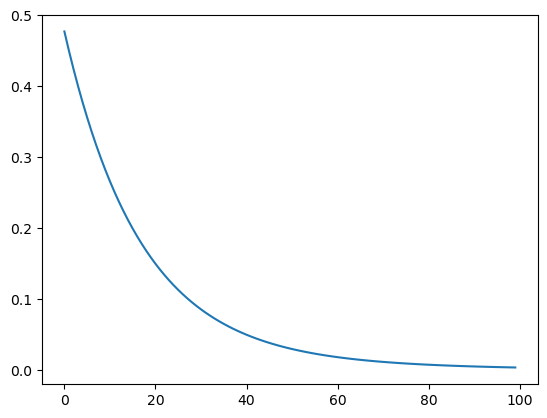

In [70]:
plt.plot(range(100), cost_)
plt.show()